In [55]:
#from_future_import absolute import,division,print_function
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



In [56]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/paddydata/paddy")
dataset_size = len(dataset)

# Define the proportions for train, validation, and test sets
train_size = int(dataset_size * 0.8)
val_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - val_size

# Split the dataset
ds_train = dataset.take(train_size)
ds_val_test = dataset.skip(train_size)
ds_val = ds_val_test.take(val_size)
ds_test = ds_val_test.skip(val_size)

# Shuffle the datasets
ds_train = ds_train.shuffle(buffer_size=1)
ds_val = ds_val.shuffle(buffer_size=1)
ds_test = ds_test.shuffle(buffer_size=1)


# Shuffle the dataset
#dataset = dataset.shuffle(buffer_size=len(dataset))

# Split dataset into training and validation sets
#train_size = int(0.8 * len(dataset))
#ds_train = dataset.take(train_size)
#ds_val = dataset.skip(train_size)

# Shuffle training and validation datasets
#ds_train =ds_train.shuffle(buffer_size=1000)
#ds_val = ds_val.shuffle(buffer_size=1000)




Found 8382 files belonging to 9 classes.


In [57]:
import tensorflow_datasets as tfds
image_height=256
image_width=256
batch_size=32
#dataset, info = tfds.load('dataset_name', with_info=True)
#class_names = info.features['label'].names
#print(class_names)
dataset_name=dataset
class_names=dataset.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal']


In [58]:
for index, class_name in enumerate(class_names):
    print(f"Class index: {index}, Class name: {class_name}")

Class index: 0, Class name: bacterial_leaf_blight
Class index: 1, Class name: bacterial_leaf_streak
Class index: 2, Class name: bacterial_panicle_blight
Class index: 3, Class name: blast
Class index: 4, Class name: brown_spot
Class index: 5, Class name: dead_heart
Class index: 6, Class name: downy_mildew
Class index: 7, Class name: hispa
Class index: 8, Class name: normal


In [59]:
size=(256,256)
ds_train=ds_train.map(lambda image, label:(tf.image.resize(image,size),label))
ds_val=ds_val.map(lambda image, label:(tf.image.resize(image,size),label))

In [60]:
for image_batch,labels_batch in ds_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


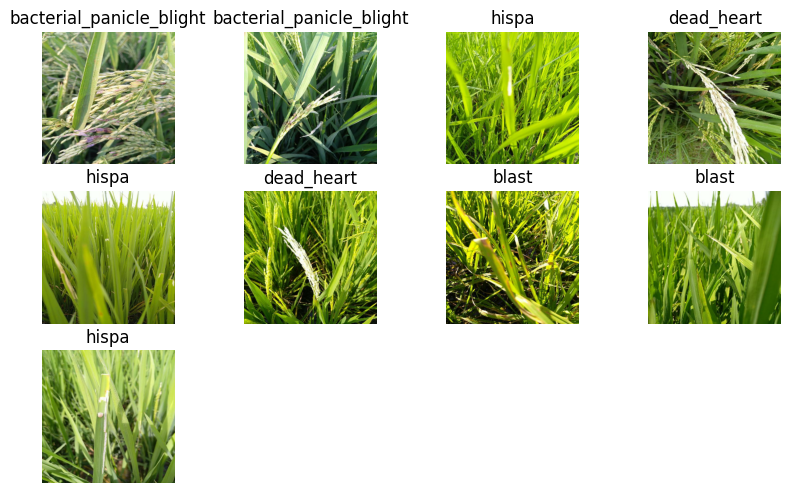

In [61]:
plt.figure(figsize=(10,10))
for images,labels in ds_train.take(1):
    for i in range(9):
        ax=plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import seaborn as sns


In [54]:
#bn_layer=BatchNormalization()

In [55]:
#data_augmentation = tf.keras.Sequential([
    #tf.keras.layers.RandomFlip('horizontal', input_shape=(256,256,3)),
    #tf.keras.layers.RandomRotation(0.2, input_shape=(256,256,3)),
    #tf.keras.layers.RandomZoom(0.1)])





In [56]:
#augmented_ds_train = ds_train.map(lambda x, y: (data_augmentation(x, training=True), y))

In [63]:
num_classes=len(class_names)
model=tf.keras.Sequential([layers.Rescaling(1./255,input_shape=(image_height,image_width,3)),
                           layers.Conv2D(16,3,padding='same',activation='leaky_relu'),
                           layers.MaxPooling2D(),
                           #BatchNormalization(),
                           layers.Conv2D(32,3,padding='same',activation='leaky_relu'),
                           layers.MaxPooling2D(),
                           #BatchNormalization(),
                           layers.Conv2D(64,3,padding='same',activation='leaky_relu'),
                           layers.MaxPooling2D(),
                           layers.Conv2D(128,3,padding='same',activation='leaky_relu'),
                           layers.MaxPooling2D(),
                           layers.Conv2D(256,3,padding='same',activation='leaky_relu'),
                           layers.MaxPooling2D(),
                           layers.Conv2D(512,3,padding='same',activation='leaky_relu'),
                           layers.MaxPooling2D(),
                           #BatchNormalization(),
                           layers.Dropout(0.4),
                           layers.Flatten(),
                           layers.Dense(1024,activation='leaky_relu'),
                           #BatchNormalization(),
                           layers.Dense(num_classes,activation='softmax')])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         9,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,971,625 (38.04 MB)

 Trainable params: 9,971,625 (38.04 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
epochs=20
history=model.fit(ds_train,validation_data=ds_val,epochs=epochs)

Epoch 1/20
  5/209 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.1140 - loss: 2.5290

W0000 00:00:1712918363.684979      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2551 - loss: 2.0045

W0000 00:00:1712918383.440781      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


209/209 ━━━━━━━━━━━━━━━━━━━━ 27s 99ms/step - accuracy: 0.2558 - loss: 2.0029 - val_accuracy: 0.4591 - val_loss: 1.5702
Epoch 2/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.4932 - loss: 1.4526 - val_accuracy: 0.6238 - val_loss: 1.1505
Epoch 3/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.6592 - loss: 0.9996 - val_accuracy: 0.6707 - val_loss: 1.1106
Epoch 4/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.7751 - loss: 0.6736 - val_accuracy: 0.7752 - val_loss: 0.7090
Epoch 5/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.8374 - loss: 0.4831 - val_accuracy: 0.8305 - val_loss: 0.5447
Epoch 6/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9033 - loss: 0.2895 - val_accuracy: 0.8882 - val_loss: 0.4266
Epoch 7/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9332 - loss: 0.2117 - val_accuracy: 0.8510 - val_loss: 0.5575
Epoch 8/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.9417 - loss: 0.1935 - val_accura

In [61]:
#1+2

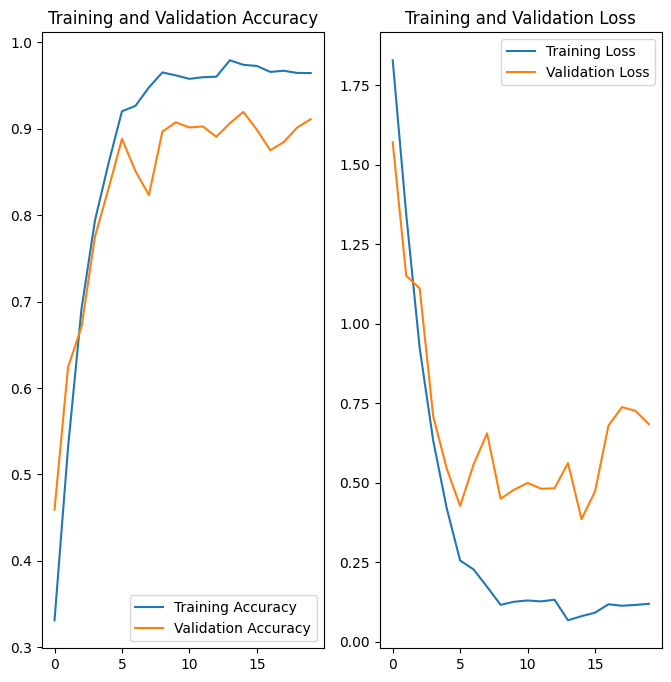

In [67]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [68]:
test_loss,test_acc=model.evaluate(ds_test,verbose=2)
print('\nTest accuracy:',test_acc)

27/27 - 11s - 404ms/step - accuracy: 0.8921 - loss: 0.6956

Test accuracy: 0.8921113610267639


W0000 00:00:1712918876.607380      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [69]:
true_labels = []
predicted_labels = []
class_labels=['Bacterial_leaf_blight','Bacterial_leaf_streak','Bacterial_panicle_blight','blast','brown_spot','dead_heart','downy_mildew','hispa','normal']

for images, labels in ds_val:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels)

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


W0000 00:00:1712918899.732755      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


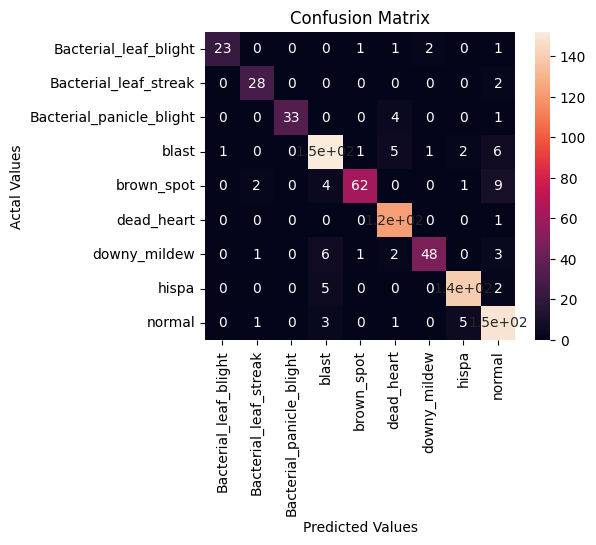

In [70]:
cm = confusion_matrix(true_labels, predicted_labels)
cm_df = pd.DataFrame(cm,
                     index = ['Bacterial_leaf_blight','Bacterial_leaf_streak','Bacterial_panicle_blight','blast','brown_spot','dead_heart','downy_mildew','hispa','normal'],
                     columns = ['Bacterial_leaf_blight','Bacterial_leaf_streak','Bacterial_panicle_blight','blast','brown_spot','dead_heart','downy_mildew','hispa','normal'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()



In [71]:

report = classification_report(true_labels, predicted_labels)
print(report)


              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.88      0.93      0.90        30
           2       1.00      0.87      0.93        38
           3       0.89      0.90      0.90       168
           4       0.95      0.79      0.87        78
           5       0.90      0.99      0.95       123
           6       0.94      0.79      0.86        61
           7       0.95      0.95      0.95       147
           8       0.86      0.94      0.89       159

    accuracy                           0.91       832
   macro avg       0.93      0.89      0.90       832
weighted avg       0.91      0.91      0.91       832



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

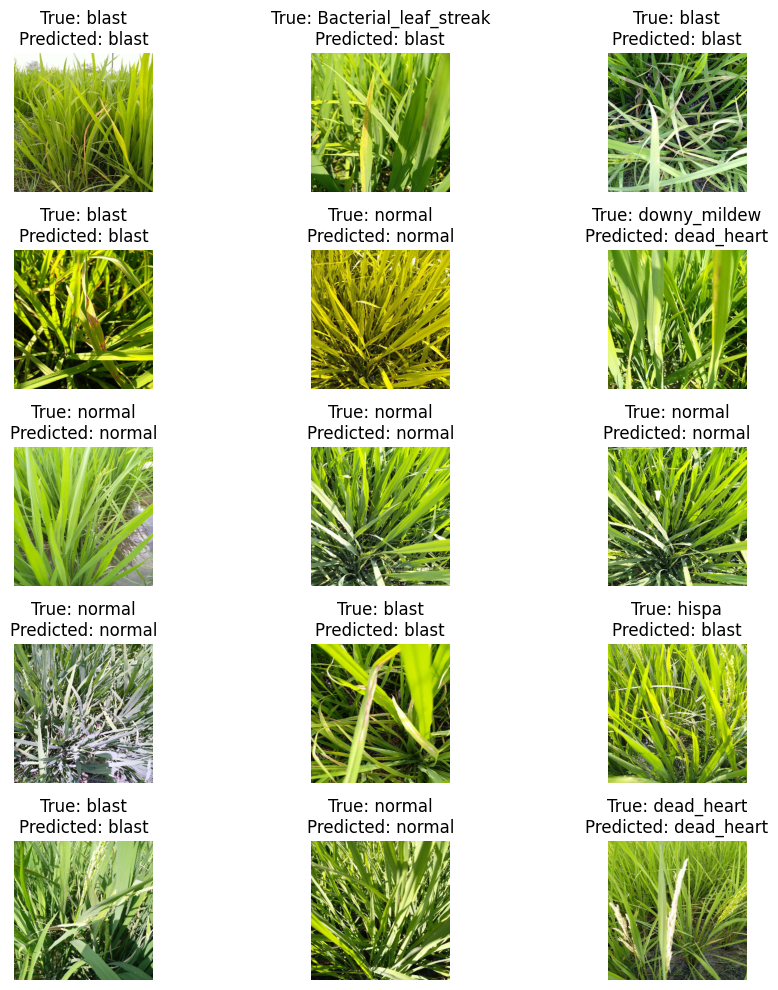

In [72]:
class_names = ['Bacterial_leaf_blight','Bacterial_leaf_streak','Bacterial_panicle_blight','blast','brown_spot','dead_heart','downy_mildew','hispa','normal'] 
fig, axes = plt.subplots(5, 3, figsize=(10, 10))
for images, labels in ds_val.take(15):  # Take the first 9 batches from ds_val
    for i, ax in enumerate(axes.flat):
        image = images[i].numpy().astype(np.uint8)
        true_label = labels[i].numpy()
        predictions = model.predict(np.expand_dims(image, axis=0))
        predicted_label = np.argmax(predictions)
        
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f'True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}')
plt.tight_layout()
plt.show()

In [73]:
from tensorflow.keras.preprocessing import image
class_names = ['Bacterial_leaf_blight','Bacterial_leaf_streak','Bacterial_panicle_blight','blast','brown_spot','dead_heart','downy_mildew','hispa','normal']

In [75]:
img_path = '/kaggle/input/rice-brownspot-1/rice_brown_spot1.jpg'
img = image.load_img(img_path, target_size=(image_height, image_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand the batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Perform prediction
predictions = model.predict(img_array)

# Interpret results
predicted_class_index = np.argmax(predictions[0])

# Get the corresponding class name from the list
predicted_class_name = class_names[predicted_class_index]
confidence = predictions[0][predicted_class_index]


print(f"Predicted class: {predicted_class_name}")
print(f"Confidence: {confidence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
Predicted class: normal
Confidence: 0.5267935991287231


In [76]:
model.save('Rice_model.h5')